In [12]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt



Columnas disponibles: Index(['semana', 'aws:_(todo_el_mundo)', 'vercel:_(todo_el_mundo)',
       'github_pages:_(todo_el_mundo)', 'netlify:_(todo_el_mundo)'],
      dtype='object')


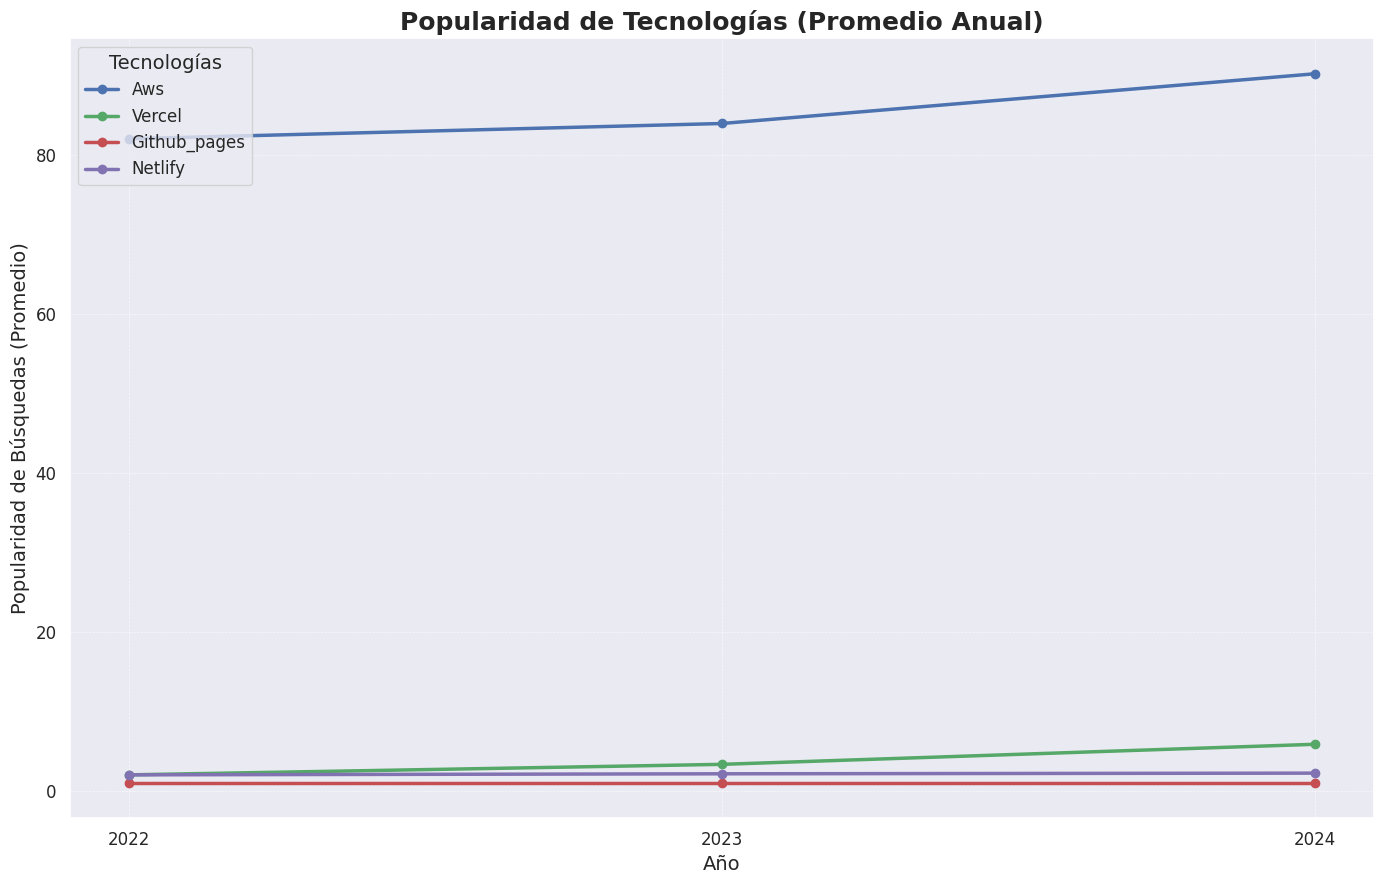


Matriz de correlación entre las tecnologías:
                               aws:_(todo_el_mundo)  vercel:_(todo_el_mundo)  \
aws:_(todo_el_mundo)                       1.000000                 0.993051   
vercel:_(todo_el_mundo)                    0.993051                 1.000000   
github_pages:_(todo_el_mundo)                   NaN                      NaN   
netlify:_(todo_el_mundo)                   0.910806                 0.953061   

                               github_pages:_(todo_el_mundo)  \
aws:_(todo_el_mundo)                                     NaN   
vercel:_(todo_el_mundo)                                  NaN   
github_pages:_(todo_el_mundo)                            NaN   
netlify:_(todo_el_mundo)                                 NaN   

                               netlify:_(todo_el_mundo)  
aws:_(todo_el_mundo)                           0.910806  
vercel:_(todo_el_mundo)                        0.953061  
github_pages:_(todo_el_mundo)                       NaN  


In [13]:


# Cargar el archivo CSV
data_excel = pd.read_csv('/content/graficos/multiTimeline (4).csv')

# Normalizar los nombres de las columnas
data_excel.columns = data_excel.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar los nombres de las columnas
print("Columnas disponibles:", data_excel.columns)

# Especificar las columnas relevantes (ajustadas a las disponibles en el archivo)
cols_to_convert = [
    'aws:_(todo_el_mundo)',
    'vercel:_(todo_el_mundo)',
    'github_pages:_(todo_el_mundo)',
    'netlify:_(todo_el_mundo)'
]

# Convertir las columnas de popularidad a tipo numérico
data_excel[cols_to_convert] = data_excel[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Convertir la columna 'semana' a tipo datetime
data_excel['semana'] = pd.to_datetime(data_excel['semana'])

# Extraer el año y agregarlo como una nueva columna
data_excel['año'] = data_excel['semana'].dt.year

# Agrupar los datos por año y calcular el promedio anual
data_excel_grouped = data_excel.groupby('año')[cols_to_convert].mean().reset_index()

# Crear un gráfico combinado para todas las tecnologías
plt.figure(figsize=(14, 9))

# Diccionario para colores de cada tecnología
tecnologias = {
    'aws:_(todo_el_mundo)': '#4C72B0',  # Azul oscuro
    'vercel:_(todo_el_mundo)': '#55A868',  # Verde
    'github_pages:_(todo_el_mundo)': '#C44E52',  # Rojo
    'netlify:_(todo_el_mundo)': '#8172B2'  # Morado
}

# Graficar cada tecnología
for tecnologia, color in tecnologias.items():
    plt.plot(
        data_excel_grouped['año'],
        data_excel_grouped[tecnologia],
        marker='o',
        color=color,
        linewidth=2.5,
        label=tecnologia.split(':')[0].capitalize()
    )

# Configurar el gráfico
plt.title('Popularidad de Tecnologías (Promedio Anual)', fontsize=18, weight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=14)
plt.xticks(data_excel_grouped['año'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Tecnologías", fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular y mostrar correlaciones entre tecnologías
correlation_matrix = data_excel_grouped[cols_to_convert].corr()
print("\nMatriz de correlación entre las tecnologías:")
print(correlation_matrix)
